In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
review_df =  pd.read_csv("amazon_reviews.csv")

In [3]:
review_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
review_df["feedback"].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

In [5]:
review_df["rating"].value_counts()

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
review_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
review_df["verified_reviews"]

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

<Axes: xlabel='feedback', ylabel='count'>

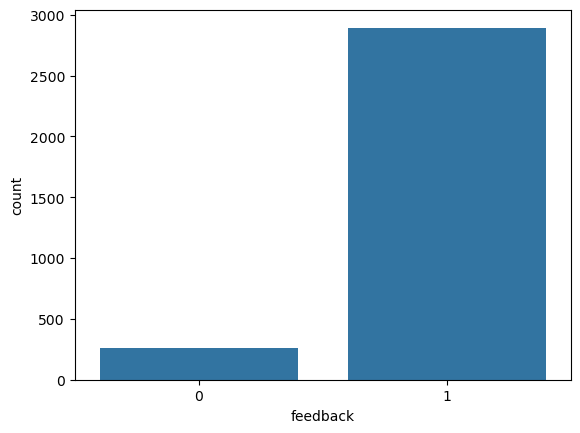

In [9]:
sns.countplot(data=review_df, x = "feedback")

In [10]:
review_df["length"] =  review_df["verified_reviews"].astype(str).apply(len)

In [11]:
review_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [12]:
review_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049206
std,1.068506,0.273778,182.100176
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [13]:
min_length =  review_df["length"].min()

In [14]:
(review_df[review_df["length"]==min_length]["verified_reviews"])

60      😍
85       
183      
219      
374      
       ..
3114     
3120     
3123     
3126     
3141     
Name: verified_reviews, Length: 81, dtype: object

In [15]:
avg_length =  review_df["length"].mean()

In [16]:
(review_df[review_df["length"]==round(avg_length,0)]["verified_reviews"])

570     Nice. It works good.Some times is not easy to ...
1655    awesome product! I am in the process of having...
1705    If you belong to amazon prime, I would think t...
2321    I expected to have access to more current movi...
2483    Works good for the most part. You ask it some ...
2834    Works good for the most part. You ask it some ...
Name: verified_reviews, dtype: object

<Axes: xlabel='length', ylabel='Count'>

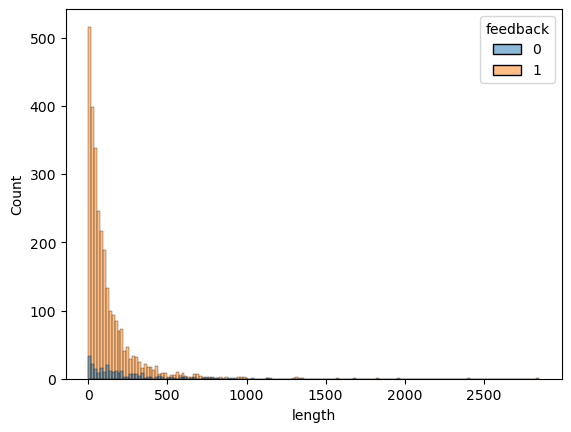

In [17]:
sns.histplot(data=review_df, x = "length", hue = "feedback")

In [18]:
positive =  review_df[review_df["feedback"]==1]

In [19]:
negative  =  review_df[review_df["feedback"]==0]

In [20]:
from wordcloud import WordCloud

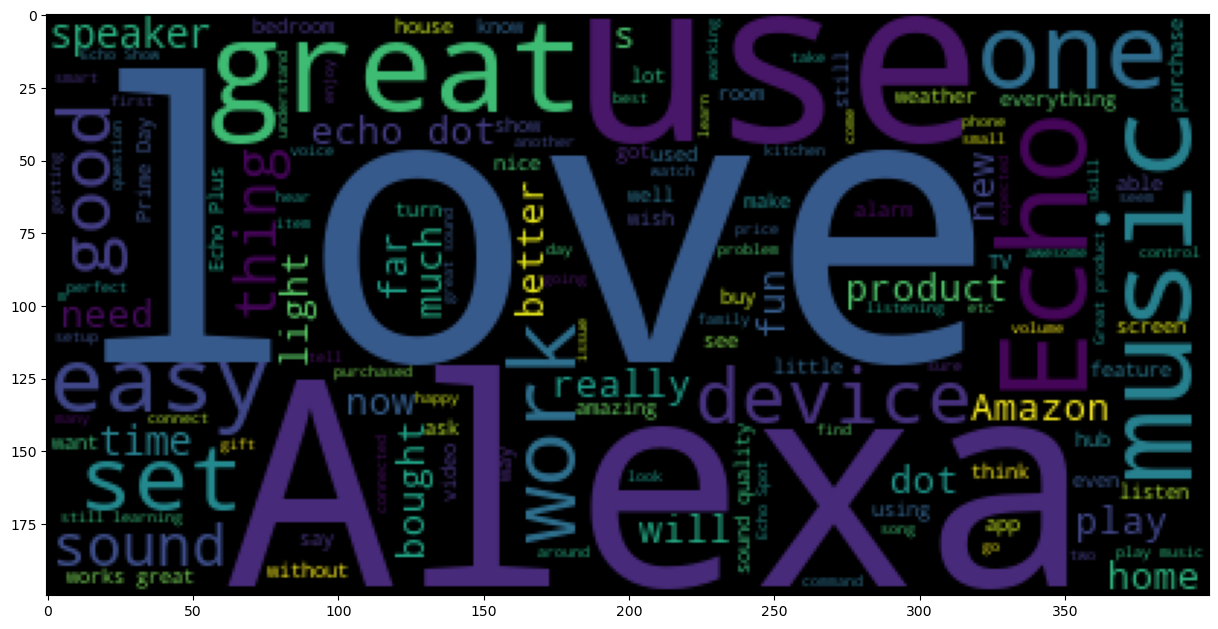

In [21]:
positive_reviews =  positive["verified_reviews"].tolist()
positive_reviews_sentences =  "".join(positive_reviews)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_reviews_sentences))
plt.show()

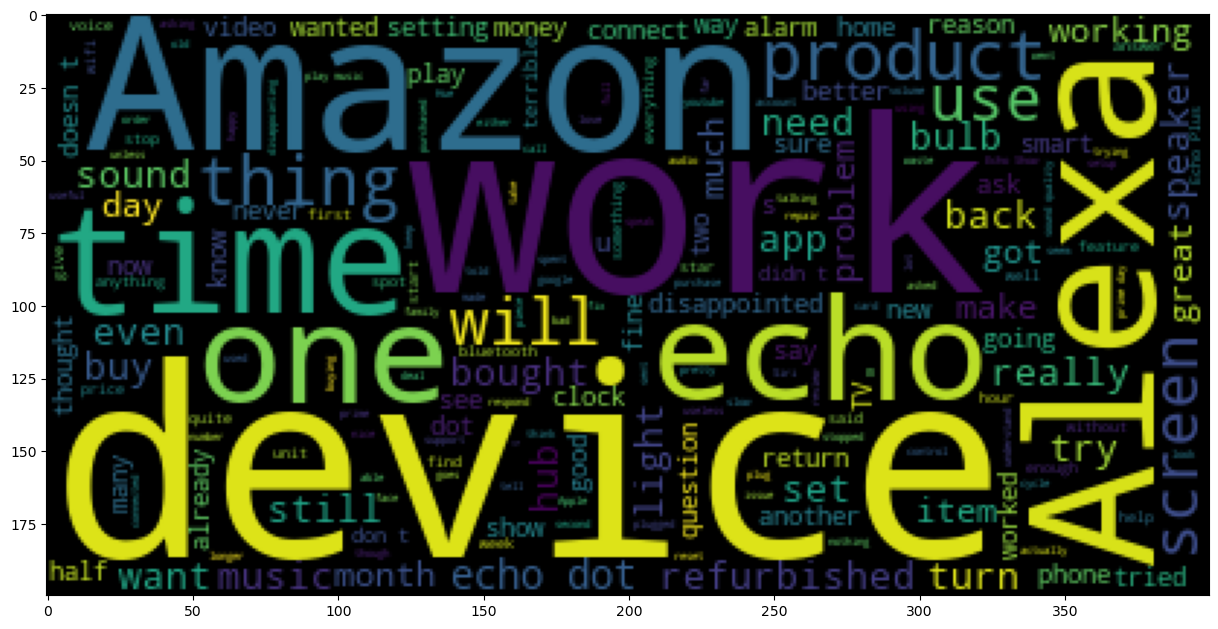

In [23]:
negative_reviews =  negative["verified_reviews"].tolist()
negative_reviews_sentences =  "".join(map(str,negative_reviews))
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_reviews_sentences))
plt.show()